In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics.pairwise import euclidean_distances

## Eurovision voting results

Dane zawierają wyniki głosowania na piosenki z konkursu Eurowizji 2014. Mamy informację o tym kto (jaki kraj) na kogo głosował. Sprawdźmy, czy jesteśmy w stanie znaleźć grupy piosenek, które podobały się oceniającym z tych samych krajów (czyli po prostu podobnych według naszych danych). Być może kraje podobne do siebie kulturowo/etnicznie znajdą się w tych samych grupach.  

Uwaga: założenie głosowania - nie można głosować na swój kraj. 


Przetestuj różne metody klastrowania.

In [2]:
data = pd.read_csv("Data2//eurowizja.csv")
data.set_index(data.columns[0],inplace=True)

In [3]:
data.head()

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
0,,,,,,,,,,,,,,,,,,,,,
Albania,0,0,0,0,0,0,0,6,0,2,...,0,0,12,0,8,1,0,0,3,0
Armenia,0,8,0,0,0,0,0,12,0,7,...,0,0,2,5,0,0,1,4,3,0
Austria,5,0,0,2,1,8,12,0,0,0,...,0,4,0,3,7,0,0,10,0,0
Azerbaijan,10,7,0,0,0,6,0,0,2,4,...,0,0,0,0,8,5,0,0,3,0
Belarus,8,0,3,0,4,1,10,0,7,6,...,0,0,0,0,5,0,0,2,0,0


kraje nie mogą głosowaćna siebie, ale gdyby mogły dały by sobie max punktów

In [4]:
for ind in range(data.shape[0]):
    country = data.index[ind]
    if country in data.columns:
        data[country][ind] = 12

In [5]:
ind = 8
print(data.index[ind])
data.iloc[ind,:]

Finland


Ukraine            0
Belarus            0
Azerbaijan         0
Iceland            0
Norway             0
Romania            4
Armenia            8
Montenegro        12
Greece             5
Poland             0
Austria            3
Germany            0
Sweden             0
France             0
Russia             6
Italy              2
Slovenia           1
Finland           12
Spain              0
Switzerland        0
Hungary           10
Malta              0
Denmark            0
Netherlands        7
San Marino         0
United Kingdom     0
Name: Finland, dtype: int64

In [33]:
data /= data.sum(axis=1)

In [6]:
data.shape

(37, 26)

In [34]:
data.describe()

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.048263,0.021236,0.017375,0.027027,0.039897,0.032432,0.071815,0.018919,0.028829,0.018147,...,0.008108,0.032432,0.033205,0.029447,0.062922,0.016988,0.033205,0.110904,0.010039,0.020077
std,0.054226,0.047095,0.047157,0.046636,0.050973,0.052017,0.059523,0.050626,0.047895,0.036832,...,0.033425,0.042009,0.046664,0.044705,0.059667,0.039675,0.045307,0.081128,0.031019,0.040189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000
50%,0.028571,0.000000,0.000000,0.000000,0.015873,0.000000,0.071429,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.014286,0.137931,0.000000,0.000000
75%,0.085714,0.000000,0.000000,0.030769,0.079365,0.057143,0.114286,0.000000,0.033333,0.028571,...,0.000000,0.057143,0.057143,0.044776,0.109375,0.000000,0.057143,0.172414,0.000000,0.014286
max,0.171429,0.171429,0.171429,0.184615,0.190476,0.171429,0.171429,0.171429,0.200000,0.171429,...,0.171429,0.171429,0.171429,0.179104,0.187500,0.171429,0.171429,0.206897,0.171429,0.171429


In [35]:
data.columns

Index(['Ukraine', 'Belarus', 'Azerbaijan', 'Iceland', 'Norway', 'Romania',
       'Armenia', 'Montenegro', 'Greece', 'Poland', 'Austria', 'Germany',
       'Sweden', 'France', 'Russia', 'Italy', 'Slovenia', 'Finland', 'Spain',
       'Switzerland', 'Hungary', 'Malta', 'Denmark', 'Netherlands',
       'San Marino', 'United Kingdom'],
      dtype='object')

In [36]:
data.index

Index(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia',
       'Lithuania', 'Macedonia', 'Malta', 'Moldova', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
       'San Marino', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom'],
      dtype='object', name='0')

### K-means

In [38]:
c_min = 3
c_max = 30
inertia = []
sil_score = []
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

for cluster in range(c_min,c_max):
    kmeans = KMeans(cluster)
    kmeans_labels = kmeans.fit_predict(data)
    sil = silhouette_score(data,kmeans_labels)
    inertia.append(kmeans.inertia_)
    sil_score.append(sil)

In [11]:
plt.style.context('ggplot')

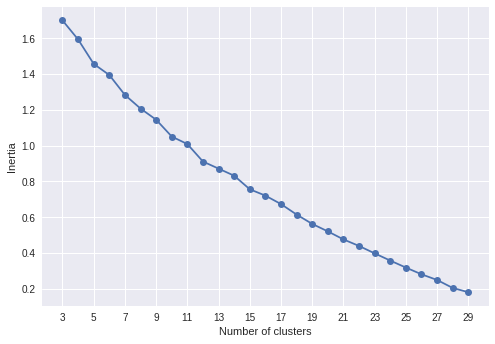

In [39]:
plt.plot(np.arange(c_min,c_max),inertia,'o-')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(c_min,c_max,2))
plt.ylabel('Inertia')
plt.show()

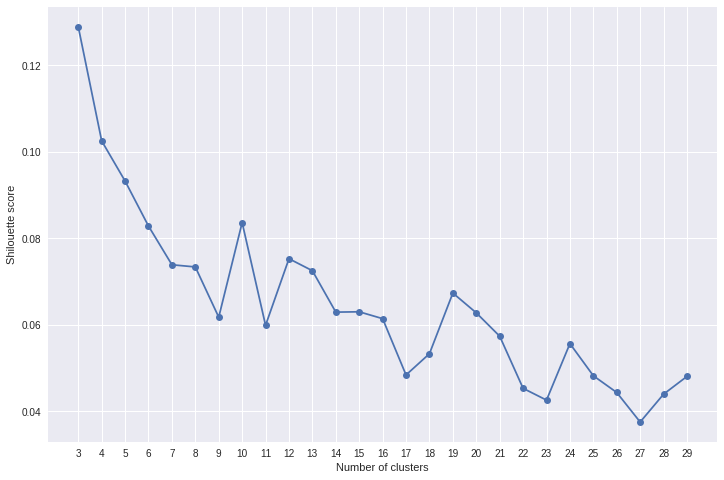

In [40]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(c_min,c_max),sil_score,'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Shilouette score')
plt.xticks(np.arange(c_min,c_max,1))
plt.show()

In [41]:
k_opt = 10
kmeans = KMeans(k_opt)
kmeans_labels = kmeans.fit_predict(data)

In [42]:
kmeans_labels

array([3, 7, 0, 5, 5, 1, 6, 1, 9, 1, 4, 2, 4, 0, 4, 1, 1, 3, 4, 1, 1, 3, 5,
       9, 6, 1, 1, 3, 5, 8, 1, 1, 4, 1, 4, 2, 6], dtype=int32)

In [43]:
data['cluster'] = kmeans_labels

In [44]:
for cluster in range(k_opt):
    #print('Cluster {}'.format(cluster))
    print(np.array(data[data.cluster == cluster].index))

['Austria' 'Hungary']
['Belgium' 'Estonia' 'France' 'Ireland' 'Israel' 'Lithuania' 'Macedonia'
 'Norway' 'Poland' 'San Marino' 'Slovenia' 'Sweden']
['Germany' 'Ukraine']
['Albania' 'Italy' 'Malta' 'Portugal']
['Georgia' 'Greece' 'Iceland' 'Latvia' 'Spain' 'Switzerland']
['Azerbaijan' 'Belarus' 'Moldova' 'Romania']
['Denmark' 'Netherlands' 'United Kingdom']
['Armenia']
['Russia']
['Finland' 'Montenegro']


### Hierarchical clustering

In [45]:
data.drop('cluster',axis=1,inplace=True)

In [46]:
data.head()

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
0,,,,,,,,,,,,,,,,,,,,,
Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085714,0.000000,0.028571,...,0.0,0.000000,0.171429,0.000000,0.125000,0.014286,0.000000,0.000000,0.042857,0.0
Armenia,0.000000,0.114286,0.000000,0.000000,0.000000,0.000000,0.171429,0.171429,0.000000,0.100000,...,0.0,0.000000,0.028571,0.074627,0.000000,0.000000,0.014286,0.068966,0.042857,0.0
Austria,0.071429,0.000000,0.000000,0.030769,0.015873,0.114286,0.171429,0.000000,0.000000,0.000000,...,0.0,0.057143,0.000000,0.044776,0.109375,0.000000,0.000000,0.172414,0.000000,0.0
Azerbaijan,0.142857,0.100000,0.171429,0.000000,0.000000,0.085714,0.000000,0.000000,0.033333,0.057143,...,0.0,0.000000,0.000000,0.000000,0.125000,0.071429,0.000000,0.000000,0.042857,0.0
Belarus,0.114286,0.171429,0.042857,0.000000,0.063492,0.014286,0.142857,0.000000,0.116667,0.085714,...,0.0,0.000000,0.000000,0.000000,0.078125,0.000000,0.000000,0.034483,0.000000,0.0


In [47]:
link_ward = linkage(data,'ward')

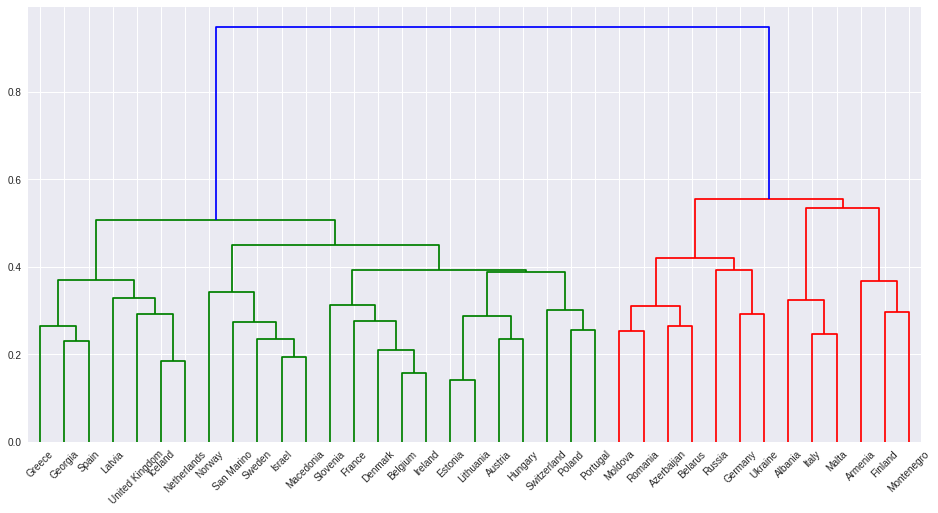

In [48]:
plt.figure(figsize=(16,8))
dendrogram(link_ward,labels=data.index,leaf_font_size=10)
plt.show();

In [49]:
t = 11
hier_labels = fcluster(link_ward,t=t,criterion='maxclust')
data['cluster'] = hier_labels-1

In [50]:
for cluster in range(t):
    print(np.array(data[data.cluster == cluster].index))

['Georgia' 'Greece' 'Spain']
['Iceland' 'Latvia' 'Netherlands' 'United Kingdom']
['Israel' 'Macedonia' 'Norway' 'San Marino' 'Sweden']
['Belgium' 'Denmark' 'France' 'Ireland' 'Slovenia']
['Austria' 'Estonia' 'Hungary' 'Lithuania']
['Poland' 'Portugal' 'Switzerland']
['Azerbaijan' 'Belarus' 'Moldova' 'Romania']
['Germany' 'Ukraine']
['Russia']
['Albania' 'Italy' 'Malta']
['Armenia' 'Finland' 'Montenegro']
